In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
movie_df.columns

Index(['imdb_id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

# 1) With Ranks

In [4]:
classification1_df = movie_df.drop(columns=['imdb_id', 'director_name', 'num_critic_for_reviews',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords',
       'num_user_for_reviews',
       'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'])

In [5]:
classification1_df

,duration,cast_total_facebook_likes,facenumber_in_poster,language,country,content_rating,budget,Biography,Comedy,Crime,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
0,123.0,22209,1.0,English,USA,PG-13,48000000.0,0,1,0,...,1,0,0,0,0,8,6,3,4,0.981155
1,88.0,2726,0.0,English,USA,PG,3500000.0,0,1,0,...,0,0,0,0,0,8,2,3,4,23.828571
2,104.0,1662,0.0,English,USA,R,4500000.0,0,0,0,...,0,0,1,0,0,7,3,3,3,13.078468
3,148.0,2566,1.0,English,USA,R,27000000.0,0,1,1,...,0,0,1,0,1,8,3,3,4,2.007407
4,98.0,14921,3.0,English,USA,R,6000000.0,0,1,0,...,0,0,0,0,1,7,7,3,5,6.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,92.0,17860,0.0,English,USA,R,35000000.0,0,1,0,...,0,0,0,0,0,7,5,3,4,1.579766
3848,100.0,18786,9.0,English,USA,R,20000000.0,0,1,0,...,0,0,0,0,0,7,5,5,5,2.773065
3849,92.0,2848,4.0,English,USA,R,5000000.0,0,1,0,...,0,0,0,0,0,5,2,4,4,2.335036
3850,81.0,3344,0.0,English,USA,PG-13,4900000.0,0,0,0,...,0,0,0,0,0,7,3,3,4,11.537962


In [6]:
Language = classification1_df['language'].transform(lambda x: x=='English')
Language = Language.to_frame()
Country = classification1_df['country'].transform(lambda x: x=='USA')
Country = Country.to_frame()
classification1_df['language'] = Language['language']
classification1_df['country'] = Country['country']
classification1_df["language"] = classification1_df["language"].astype(int)
classification1_df["country"] = classification1_df["country"].astype(int)

Above, we convert language to binary of English language and non-english and convert country variable to binary USA or not USA.

In [7]:
df1 = pd.get_dummies(classification1_df, columns=['content_rating'])

## 1.1) Seperating into 3 classes

In [8]:
RatioClass = df1['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
2    1023
1     934
Name: gross_budget_ratio, dtype: int64

In [9]:
df11 = df1.copy()
df11['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [10]:
X = df11.drop(columns=['gross_budget_ratio'])
y = df11['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2696, 28)
Dimensionality of X_test : (1156, 28)
Dimensionality of y_train: (2696,)
Dimensionality of y_test : (1156,)


### 1.1.1) Multi-Class Logistic Regression

In [11]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [12]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 1, 'penalty': 'l2'}
MLR Train score: 0.530920060331825
MLR Test score: 0.47231833910034604


Text(0.5, 1, 'Multiclass Logistic Regression')

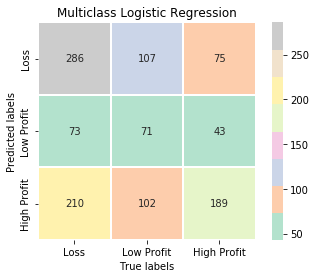

In [13]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.1.2) Decision Tree Classifier

In [14]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.1}
DTC Train score: 0.5467359050445104
DTC Test score: 0.5198961937716263


Text(0.5, 1, 'Decision Tree Classifier')

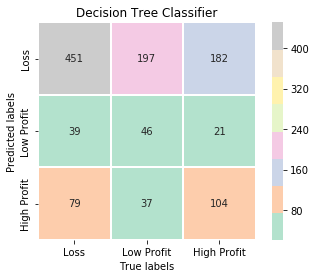

In [15]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.3) Random Forest Classifier

In [16]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.7956231454005934
RFC Test score: 0.5415224913494809


Text(0.5, 1, 'Random Forest Classifier')

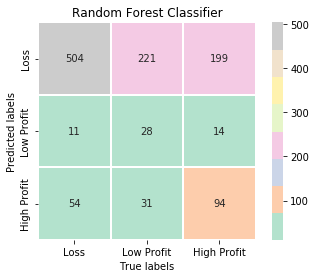

In [17]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.4) KNN Classifier

In [18]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [19]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5226261127596439
KNN Test score: 0.5034602076124568


Text(0.5, 1, 'KNN Classifier')

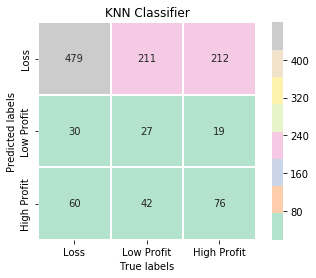

In [20]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.5) Gaussian Naive Bayes Classifier

In [21]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.3356824925816024
GNB Test score: 0.31920415224913495


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

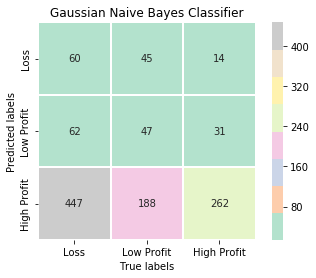

In [22]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2) Seperating into 2 classes

In [23]:
RatioClass = df1['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

1    1957
0    1895
Name: gross_budget_ratio, dtype: int64

In [24]:
df12 = df1.copy()
df12['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [25]:
X = df12.drop(columns=['gross_budget_ratio'])
y = df12['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2696, 28)
Dimensionality of X_test : (1156, 28)
Dimensionality of y_train: (2696,)
Dimensionality of y_test : (1156,)


### 1.2.1) Logistic Regression

In [26]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = linear_model.LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))

LR best parameters: {'C': 1, 'penalty': 'l1'}
LR Train score: 0.6324183976261127
LR Test score: 0.5994809688581315


Text(0.5, 1, 'Logistic Regression')

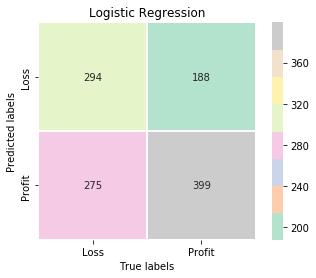

In [27]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.2.2) Decision Tree Classifier

In [28]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.1}
DTC Train score: 0.6520771513353115
DTC Test score: 0.5726643598615917


Text(0.5, 1, 'Decision Tree Classifier')

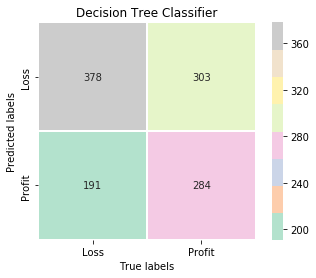

In [29]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.3) Random Forest Classifier

In [30]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}
RFC Train score: 0.9992581602373887
RFC Test score: 0.6089965397923875


Text(0.5, 1, 'Random Forest Classifier')

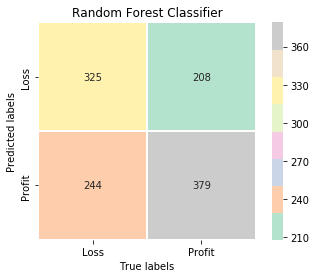

In [31]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.4) KNN Classifier

In [32]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [33]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.6253709198813057
KNN Test score: 0.5795847750865052


Text(0.5, 1, 'KNN Classifier')

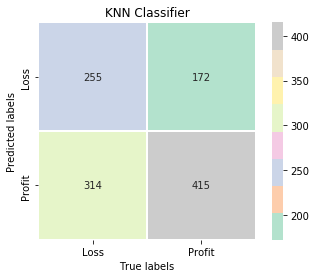

In [34]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.5) Gaussian Naive Bayes Classifier

In [35]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.517433234421365
GNB Test score: 0.5060553633217993


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

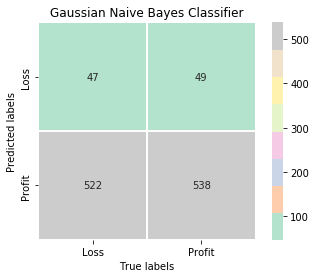

In [36]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')